**EXERCISE 1**

With the dataset provided in the file `ucla_binary.csv`, use logistic regression to estimate whether a student will be admitted to university using the **student's GPA** and **GRE score** along with the **rank** indicating the prestige of the student's undergraduate institution.

In [199]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [200]:
# And some functions we will need
from statsmodels.discrete.discrete_model import Logit
from scipy.special import logit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, matthews_corrcoef
from sklearn. metrics import classification_report

In [201]:
# Read the data
df = pd.read_csv("ucla_binary.csv")
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [202]:
# Your work here

In [203]:
y = df['admit']
x = df[['gre', 'gpa', 'rank']]

Rank is an ordinal variable. convert to a set of dummies which will be used as a predictors in our logistic regression model.

In [204]:
x = pd.get_dummies(x, columns=['rank'], drop_first=True)
x.head()

,gre,gpa,rank_2,rank_3,rank_4
0,380,3.61,False,True,False
1,660,3.67,False,True,False
2,800,4.00,False,False,False
3,640,3.19,False,False,True
4,520,2.93,False,False,True


In [205]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

fit the model.

In [206]:
reg = 0.01
model = LogisticRegression(C=1/reg, solver="liblinear").fit(x_train, y_train)
predictions = model.predict(x_test)

look at the resulting regression parameters.

In [207]:
# Get the intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_
print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficients}')


Intercept: [-3.29587417]
Coefficients: [[ 1.25590103e-03  7.99628223e-01 -7.17083329e-01 -1.47035261e+00
  -1.85340532e+00]]


look at the model summary. We will discuss the meaning of these values later.

In [208]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.94      0.82        82
           1       0.67      0.26      0.38        38

    accuracy                           0.73       120
   macro avg       0.70      0.60      0.60       120
weighted avg       0.71      0.72      0.68       120



derive the binary estimates $\hat{y}$ of the response $y$.

In [209]:
y_scores = model.predict_proba(x_test)
y_scores

array([[0.63779324, 0.36220676],
       [0.86184965, 0.13815035],
       [0.87478079, 0.12521921],
       [0.81494589, 0.18505411],
       [0.61967913, 0.38032087],
       [0.66629633, 0.33370367],
       [0.89415659, 0.10584341],
       [0.71940904, 0.28059096],
       [0.81083692, 0.18916308],
       [0.60174479, 0.39825521],
       [0.85744589, 0.14255411],
       [0.72126592, 0.27873408],
       [0.49188338, 0.50811662],
       [0.69505218, 0.30494782],
       [0.29794068, 0.70205932],
       [0.89480474, 0.10519526],
       [0.29247977, 0.70752023],
       [0.51665432, 0.48334568],
       [0.38599551, 0.61400449],
       [0.80317514, 0.19682486],
       [0.77986211, 0.22013789],
       [0.59681969, 0.40318031],
       [0.68122791, 0.31877209],
       [0.80758654, 0.19241346],
       [0.63170814, 0.36829186],
       [0.8288598 , 0.1711402 ],
       [0.53067332, 0.46932668],
       [0.80418723, 0.19581277],
       [0.42955927, 0.57044073],
       [0.88176747, 0.11823253],
       [0.

create a **confusion matrix** 

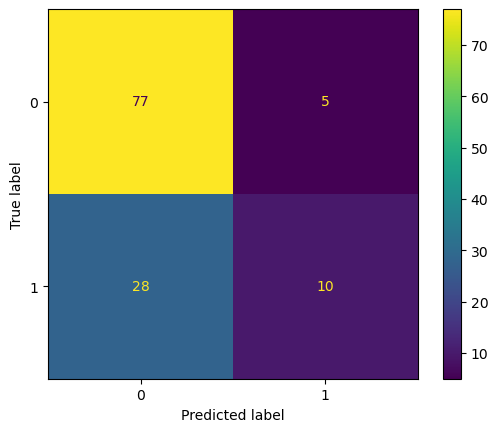

In [219]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [0, 1])

cm_display.plot()

# Evaluation of the Logistic Regression Model

**EXERCISE 2**

Evaluate the logistic regression model from the previous exercise using statistical accuracy, MCC, precision, recall, etc.

In [220]:
print('Accuracy: ', accuracy_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("MCC:", matthews_corrcoef(y_test, predictions))

Accuracy:  0.725
Recall: 0.2631578947368421
Precision: 0.6666666666666666
MCC: 0.28438163441456243


# Receiver Operating Characteristic

**EXERCISE 3**

  - Generate receiver operating characteristics (ROC) of the logistic regression model from the previous exercises
  - Calculate the area under the ROC curve
  - Identify the point where the model's sensitivity is equal to its specificity
  - Identify the point that maximizes the sum of sensitivity and specificity
  - Identify the point corresponding to the default discrimination threshold ($d_{th} = 0.5$)

In [212]:
# Your work here

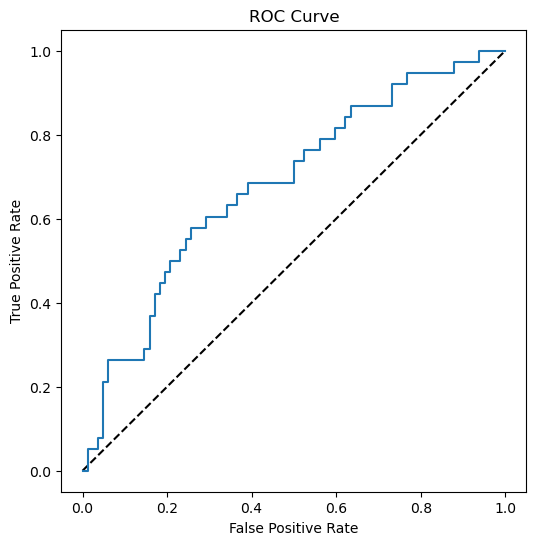

AUC: 0.6819640564826701


In [213]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

In [214]:
# Find the point where sensitivity (tpr) is equal to specificity (1-fpr)
idx_equal = (tpr >= 1 - fpr).nonzero()[0][0]
threshold_equal = thresholds[idx_equal]

# Find the point that maximizes the sum of sensitivity and specificity
youden_index = tpr - fpr
idx_max_youden = youden_index.argmax()
threshold_max_youden = thresholds[idx_max_youden]

# Find the point corresponding to the default discrimination threshold (0.5)
idx_default = (thresholds >= 0.5).nonzero()[0][0] if any(thresholds >= 0.5) else -1
threshold_default = thresholds[idx_default] if idx_default != -1 else None

print(f"Point where sensitivity equals specificity: {threshold_equal}")
print(f"Point that maximizes the sum of sensitivity and specificity: {threshold_max_youden}")
print(f"Point corresponding to the default discrimination threshold: {threshold_default}")

Point where sensitivity equals specificity: 0.29770011128684243
Point that maximizes the sum of sensitivity and specificity: 0.340832157304575
Point corresponding to the default discrimination threshold: 1.7075202256161546


**EXERCISE 4**

Using the logistic regression model from the previous exercises:

1. Plot the dependence of the accuracy and MCC on the choice of the discrimination threshold.<br><br>
  
2. Optimize the discrimination threshold to:<br>

    - Maximize the statistical accuracy of the model<br><br>
  
    - Maximize the MCC of the model<br><br>
  
3. Use the ROC to highlight the ROC points that correspond to the obtained thresholds. How much do the obtained thresholds differ from the ROC points identified in the previous exercises?

In [215]:
# Your work here

In [216]:
accuracy_list = []
mcc_list = []

for threshold in thresholds:
    y_pred = (y_scores[:,1] >= threshold).astype(int)
    accuracy_list.append(accuracy_score(y_test, y_pred))
    mcc_list.append(matthews_corrcoef(y_test, y_pred))

    
accuracy = np.array(accuracy_list)
mcc = np.array(mcc_list)

idx_max_acc = np.argmax(accuracy)
idx_max_mcc = np.argmax(mcc)
optimal_accuracy_threshold = thresholds[idx_max_acc]
optimal_mcc_threshold = thresholds[idx_max_mcc]

print(f'Optimal Threshold for Accuracy: {optimal_accuracy_threshold}')
print(f'Optimal Threshold for MCC: {optimal_mcc_threshold}')

Optimal Threshold for Accuracy: 0.5036124556045133
Optimal Threshold for MCC: 0.340832157304575


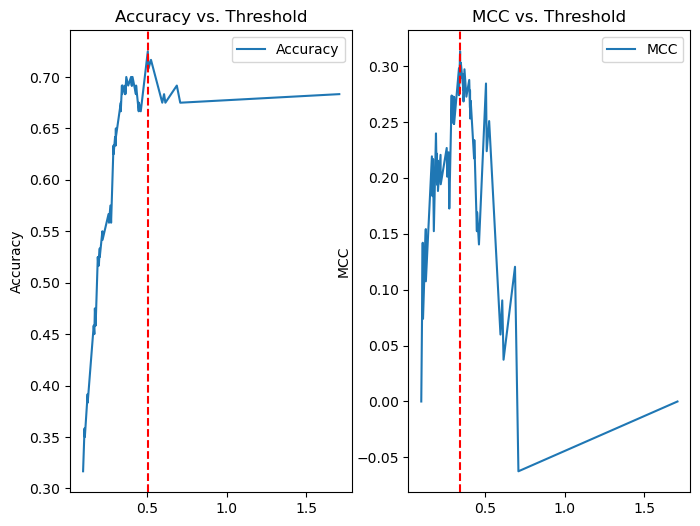

In [217]:
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(thresholds, accuracy, label='Accuracy')
plt.axvline(x=optimal_accuracy_threshold, color='red', linestyle='--')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(thresholds, mcc, label='MCC')
plt.axvline(x=optimal_mcc_threshold, color='red', linestyle='--')
plt.ylabel('MCC')
plt.title('MCC vs. Threshold')
plt.legend()

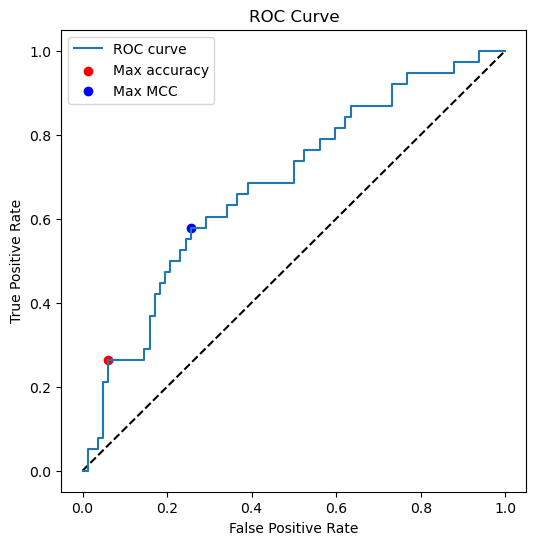

In [218]:
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve')
plt.scatter(fpr[idx_max_acc], tpr[idx_max_acc], color='red', label='Max accuracy')
plt.scatter(fpr[idx_max_mcc], tpr[idx_max_mcc], color='blue', label='Max MCC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()